This notebook is part of the various tests for scimap. It's intended to allow for visual evaluation of fits, etc.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
plt.xkcd()
import pandas as pd
import scimap

from scimap.txm.xanes_frameset import fit_whiteline

8347    0.408589
8348    0.420175
8349    0.437347
8350    0.457888
8351    0.476525
8352    0.486835
8353    0.484756
8354    0.471133
8355    0.451172
8356    0.431272
8358    0.406015
dtype: float64
8347    0.397285
8348    0.427224
8349    0.445162
8350    0.451575
8351    0.473178
8352    0.493499
8353    0.484272
8354    0.465208
8355    0.453730
8356    0.430049
8358    0.412220
dtype: float64
Center: 8352.33889487
Goodness of fit: 0.002039360410954735


(8340, 8360)

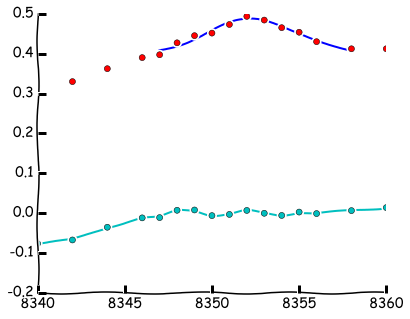

In [11]:
xanes_spectrum = pd.Series.from_csv('testdata/NCA-cell2-soc1-fov1-xanesspectrum.tsv', sep='\t')
(peak, goodness) = fit_whiteline(xanes_spectrum, width=5)  
peak.plot_fit()

fit = peak.fit_list[0]

print("Center:", peak.center())
print("Goodness of fit:", goodness)
residuals = peak.residuals(observations=xanes_spectrum)
xanes_spectrum.plot(ax=plt.gca(), marker='o', linestyle="None")
residuals.plot(ax=plt.gca(), marker='o')

plt.xlim(8340, 8360)

# XRD Peak Fitting

(-10, 40)

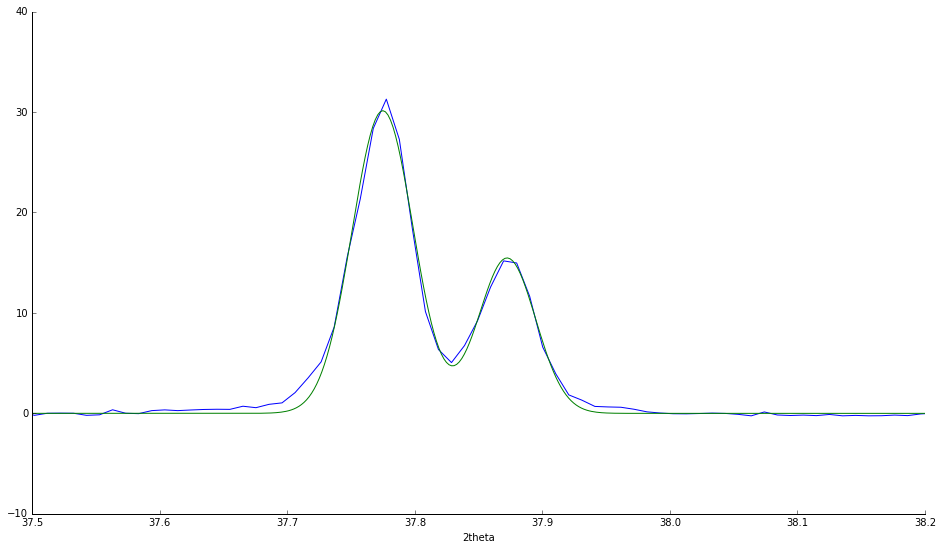

In [12]:
peakScan = scimap.XRDScan('testdata/corundum.xye',
                   phase=scimap.standards.Corundum())
ax = scimap.big_axes()
# Subtract background for plotting
df = peakScan.diffractogram.loc[:, 'counts'] - peakScan.refinement.background
df.plot(ax=ax)

# Run peak refinement
peak = scimap.XRDPeak(reflection=scimap.Reflection('110', (37, 39)))
peakScan.refinement.refine_background()
df = peakScan.refinement.subtracted[37:39]
peak.fit(two_theta=df.index, intensity=df, method='gaussian')

# Plot resulting fit
peak.plot_overall_fit(ax=plt.gca())
plt.xlim(37.5, 38.2); plt.ylim(-10, 40)